In [52]:
import os.path as op
import sys
sys.path.append('../externals/hnn-core')

import hnn_core
from hnn_core import calcium_model, simulate_dipole, MPIBackend, read_params, jones_2009_model
from hnn_core.network_models import add_erp_drives_to_jones_model
from hnn_core.viz import NetworkPlot

In [53]:
hnn_core_root = op.dirname(hnn_core.__file__)
params_fname = op.join(hnn_core_root, 'param', 'default.json')

params = read_params(params_fname)
params.update({'N_pyr_x': 50, 'N_pyr_y': 2})

# net = calcium_model(params)
net = jones_2009_model(params)
net.set_cell_positions(inplane_distance=100)
net._N_pyr_x = 100
net._N_pyr_y = 1
add_erp_drives_to_jones_model(net)

with MPIBackend(n_procs=4):
    dpl = simulate_dipole(net, tstop=170, dt=0.5, record_vsec='all')

MPI will run 1 trial(s) sequentially by distributing network neurons over 4 processes.
numprocs=4
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn_wave/externals/hnn-core/hnn_core/mod/x86_64/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn_wave/externals/hnn-core/hnn_core/mod/x86_64/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn_wave/externals/hnn-core/hnn_core/mod/x86_64/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn_wave/externals/hnn-core/hnn_core/mod/x86_64/libnrnmech.so
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


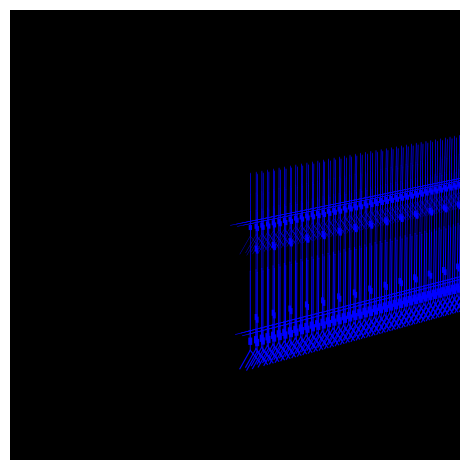

In [54]:
net_plot = NetworkPlot(net)


In [80]:
%matplotlib inline
for time_idx in range(20):  
    net_plot.set_time_idx(180 + time_idx)
    net_plot.azim = -400
    net_plot.fig.savefig(f'../notebooks/fig{time_idx}.png')


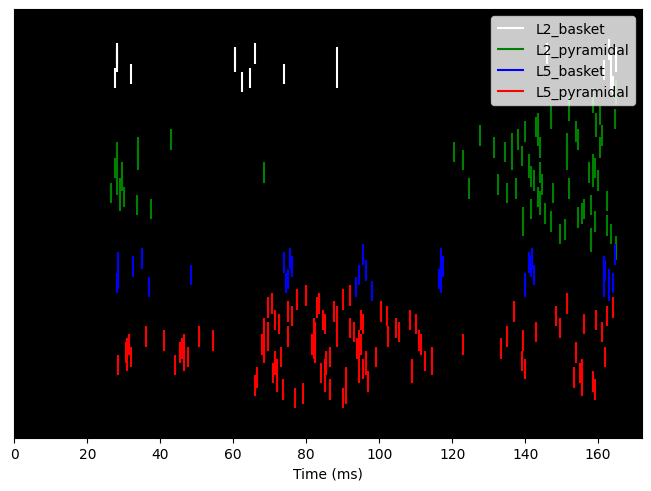

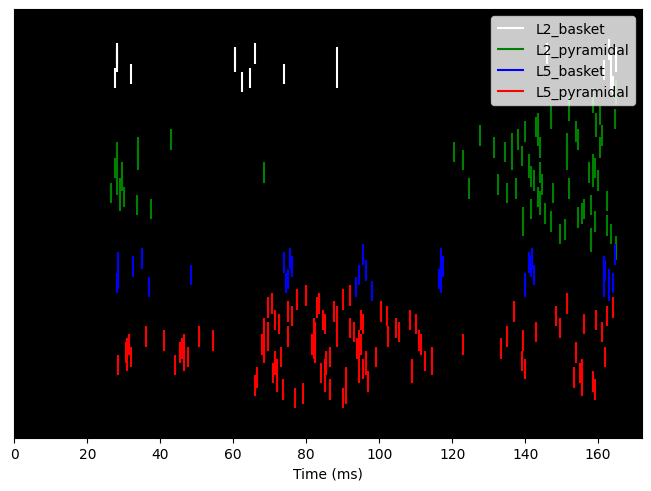

In [57]:
net.cell_response.plot_spikes_raster()

In [ ]:
net_plot.export_movie('demo.gif', dpi=200)